# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [61]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
np.random.seed(999)

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


x_10


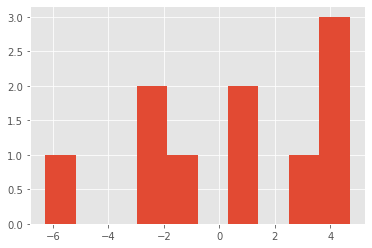

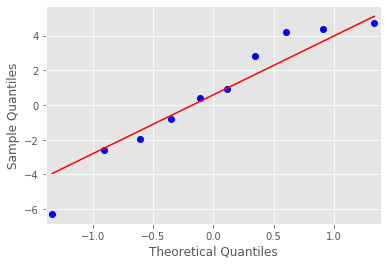

x_50


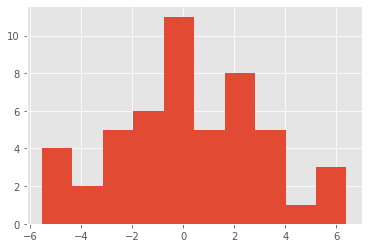

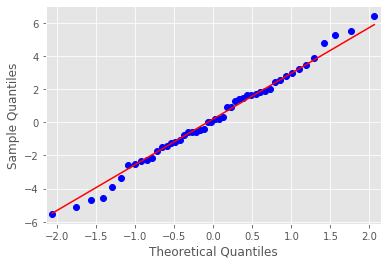

x_100


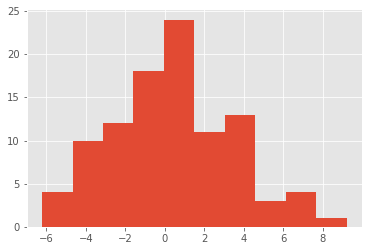

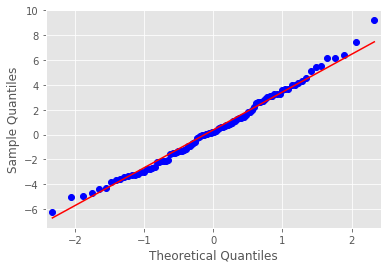

x_1000


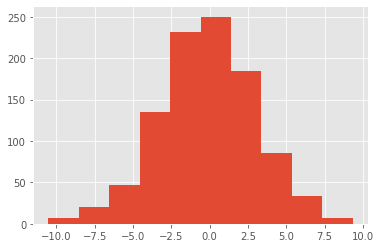

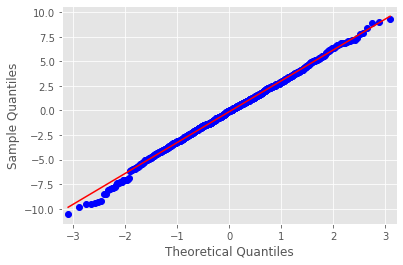

In [62]:
# Plot histograms and Q-Q plots for above datasets
datasets = [x_10, x_50, x_100, x_1000]
labels = ['x_10', 'x_50', 'x_100', 'x_1000']
for i, dataset in enumerate(datasets):
    print(labels[i])
    plt.hist(dataset)
    sm.qqplot(dataset, line='s')
    plt.show()



In [63]:
# Your comments here 
# histograms should not be used to determine normality, these are better used for symmetry, skewness, outliers
# not clear from the histograms that we can reject any data set as not being normal
# Q-Q plot is more helpful in determining normality as there is a reference line to compare to

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

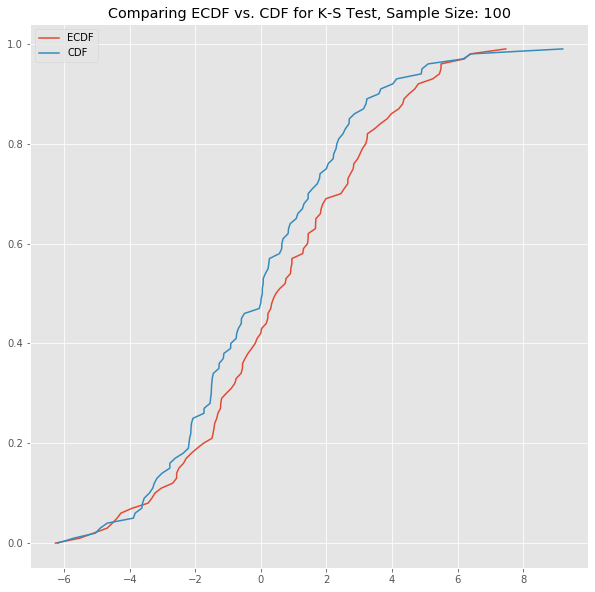

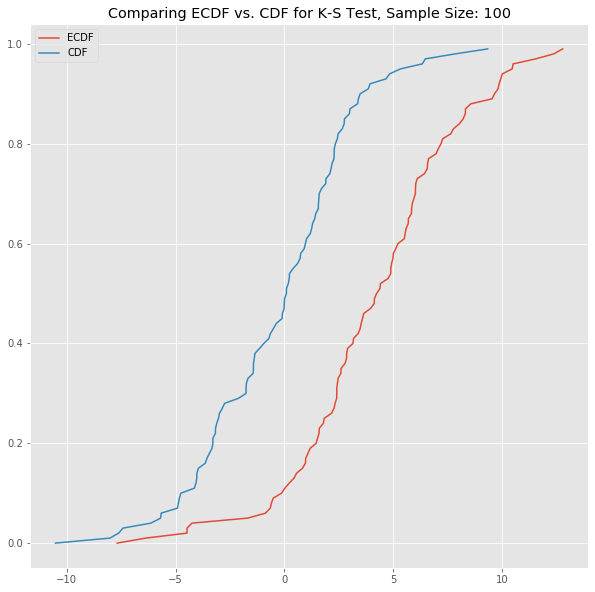

In [64]:
# You code here 
# set seed so we can have reproducibility
np.random.seed(999)

def ks_plot(data):
    plt.figure(figsize=(10, 10))
    
    #ECDF
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    
    #CDF
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))
    
    plt.legend(['ECDF', 'CDF'])
    plt.title(f'Comparing ECDF vs. CDF for K-S Test, Sample Size: {len(data)}')
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

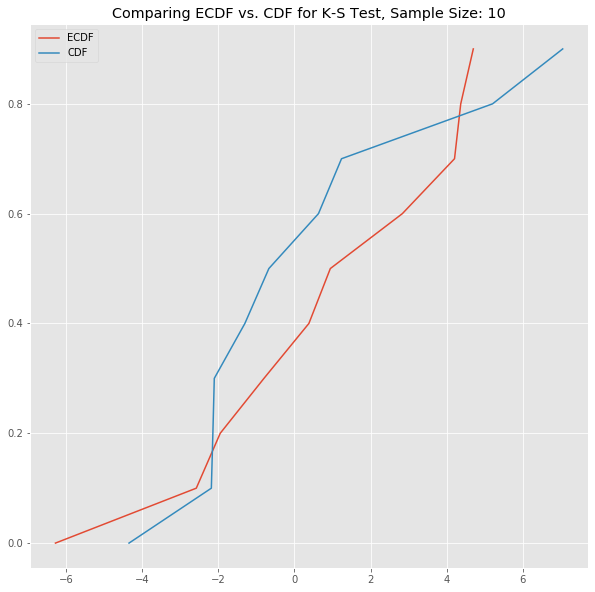

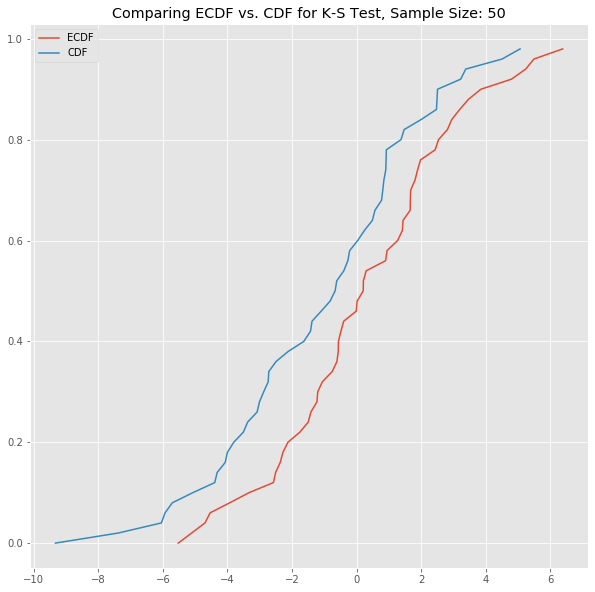

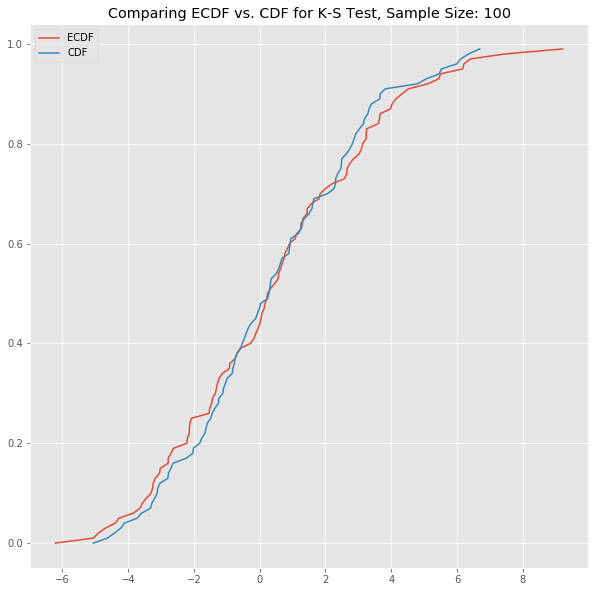

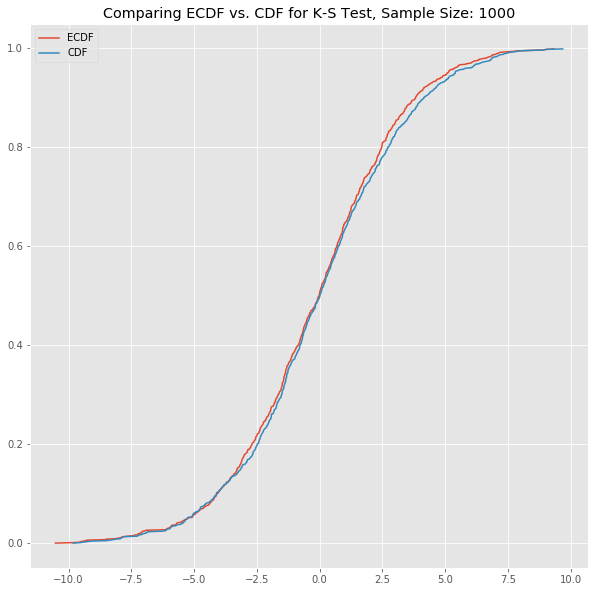

In [65]:
# Your code here 
datasets = [x_10, x_50, x_100, x_1000]
for dataset in datasets:
    ks_plot(dataset)
    

In [66]:
# Your comments here 
# With more datapoints we get a better sense of normality. With smaller sample sizes, it is likely that d is large
# with larger sample sizes and more data, we are in a better position to comment on normality

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [67]:
# Perform K-S test 
np.random.seed(999)
# Your code here 
for dataset in datasets:
    print(stats.kstest(rvs=dataset, cdf='norm', args=(0, 3)))

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.22774545043649097, pvalue=0.6161842802064873)
KstestResult(statistic=0.07542771375133389, pvalue=0.9385405117109562)
KstestResult(statistic=0.07485354745873296, pvalue=0.6210804255190506)
KstestResult(statistic=0.02657438376208565, pvalue=0.47860755891628537)


In [69]:
# Your comments here 
# p-value in all cases is much greater than alpha of 0.05, we fail to reject the null hypothesis that these 
# distributions are the same - makes sense as we were starting with normal distributions

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [85]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution
print(stats.kstest(rvs=x_uni, cdf='norm', args=(0, 3)))
print(stats.kstest(x_uni, 'uniform'))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.5000764894014846, pvalue=8.940857982931285e-232)
KstestResult(statistic=0.022897808685736654, pvalue=0.6708444889042053)


In [86]:
# Your comments here 
# when comparing against a normal distribution, we get an extremely small p-val. With an alpha level of 0.05, 
# we can reject the null hypothesis that the distribution is normal.  
# When comparing against a uniform distribution, we have a much higher p-value, and can no longer reject the null
# hypothesis at an alpha level of 0.05 - this makes sense as we started with a uniform distribution 

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

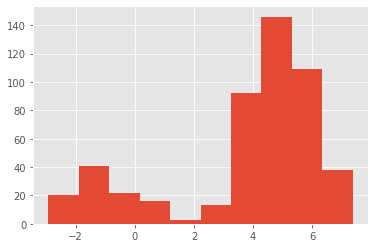

In [87]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

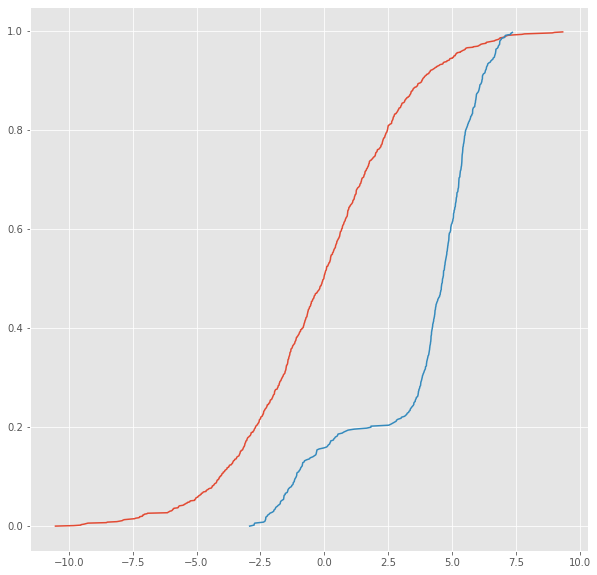

In [90]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    plt.figure(figsize=(10, 10))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.show()
    pass

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [91]:
# You comments here 
# just looking at the plot, it appears that these distributions are different, and the uniform distribution does not
# appear to fit normal

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [102]:
# Your code here
print(stats.ks_2samp(x_1000, x_1000_bi[:,0]))
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.64, pvalue=2.9976021664879227e-15)


In [103]:
# Your comments here 
# very small p-value, so we can reject the null hypothesis that these two samples come from the same distribution

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 